In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 99% 2.28G/2.29G [00:14<00:00, 289MB/s]
100% 2.29G/2.29G [00:14<00:00, 171MB/s]


In [5]:
import zipfile
zip_ref=zipfile.ZipFile('/content/chest-xray-pneumonia.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

# Define the data directories
train_dir = "/content/chest_xray/train"
val_dir = "/content/chest_xray/val"
test_dir = "/content/chest_xray/test"



In [7]:
# Define image size and other parameters
img_width, img_height = 224, 224
batch_size = 32
epochs = 10

# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# No data augmentation for validation and test sets
val_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Load the data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Create the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=epochs, validation_data=val_generator, validation_steps=len(val_generator))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test accuracy: {test_acc}")


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/10
163/163 [==============================] - 122s 670ms/step - loss: 0.3983 - accuracy: 0.8261 - val_loss: 0.5845 - val_accuracy: 0.6875
Epoch 2/10
163/163 [==============================] - 111s 678ms/step - loss: 0.2467 - accuracy: 0.8988 - val_loss: 0.3952 - val_accuracy: 0.8125
Epoch 3/10
163/163 [==============================] - 113s 690ms/step - loss: 0.2170 - accuracy: 0.9137 - val_loss: 0.9547 - val_accuracy: 0.6875
Epoch 4/10
163/163 [==============================] - 111s 681ms/step - loss: 0.2040 - accuracy: 0.9187 - val_loss: 0.7189 - val_accuracy: 0.6250
Epoch 5/10
163/163 [==============================] - 113s 692ms/step - loss: 0.1712 - accuracy: 0.9363 - val_loss: 0.6835 - val_accuracy: 0.6250
Epoch 6/10
163/163 [==============================] - 111s 684ms/step - loss: 0.1566 - accuracy: 0.9406 - val_loss: 0.7131 - val_accuracy: 0.6250
E

In [8]:
# Save the model
model.save('path/to/save/model.h5')
print("Model saved successfully.")


Model saved successfully.


In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the saved model
model_path = '/content/path/to/save/model.h5'
model = load_model(model_path)

# Define the image size (should be the same as used during training)
img_width, img_height = 224, 224

def classify_image(img_path):
    # Load the image and preprocess it for prediction
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the pixel values

    # Make the prediction
    prediction = model.predict(img_array)
    predicted_class = "NORMAL" if prediction[0][0] < 0.5 else "PNEUMONIA"
    confidence = 1 - prediction[0][0] if predicted_class == "NORMAL" else prediction[0][0]

    return predicted_class, confidence

# Example usage
input_image_path = '/content/this is my xray.jpg'
predicted_class, confidence = classify_image(input_image_path)

print(f"The image is classified as: {predicted_class}")
print(f"Confidence: {confidence:.2f}")


1/1 [==============================] - 0s 104ms/step
The image is classified as: NORMAL
Confidence: 0.92


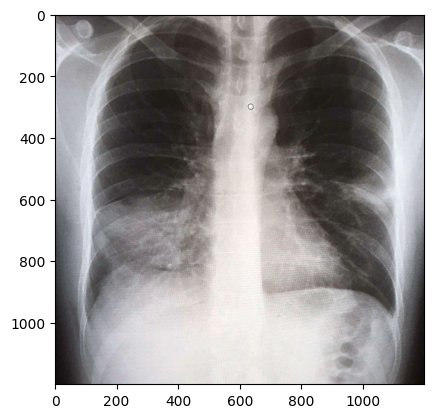

In [26]:
import matplotlib.pyplot as plt
import cv2
test_img=cv2.imread('/content/MSF179231.jpg')
plt.imshow(test_img)

In [25]:
# Example usage
input_image_path = '/content/MSF179231.jpg'
predicted_class, confidence = classify_image(input_image_path)

print(f"The image is classified as: {predicted_class}")
print(f"Confidence: {confidence:.2f}")

1/1 [==============================] - 0s 27ms/step
The image is classified as: PNEUMONIA
Confidence: 0.94
